In [1]:
# pip install seaborn --upgrade

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
df = pd.read_csv('Netflix_Dataset.csv', encoding='utf-8', encoding_errors='ignore')

In [164]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [165]:
### Checking for na values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [166]:
# or 
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [167]:
# For Our Analysis practice, Director is not Relevent. So don't do anything about it. For the rest of the columns, 
# drop those row

In [168]:
df.dropna(subset = ['Country', 'Release_Date', 'Rating'], inplace = True)

In [169]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2075
Cast             622
Country            0
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
dtype: int64

#### Droppping Duplicates, if present

In [172]:
df.drop_duplicates(subset = 'Show_Id', inplace = True)
df.reset_index(inplace = True, drop = True)

In [173]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [174]:
### Dropping cast and description columns
df.drop(['Cast', 'Description'], axis = 1, inplace =True)

In [175]:
df['Release_Date'] = df['Release_Date'].apply(lambda x: pd.to_datetime(x).date())
df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas


# Analysis of Movie & TV Show Categories

### Q1. What are the most common genres or types of movies/TV shows?

In [176]:
shows_movies_genre = pd.DataFrame(df['Type'].value_counts())
shows_movies_genre

,count
Type,
Documentaries,322
"Dramas, International Movies",307
Stand-Up Comedy,293
"Comedies, Dramas, International Movies",240
"Dramas, Independent Movies, International Movies",213
...,...
"Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy",1
"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows",1
"Anime Series, TV Horror, TV Thrillers",1


In [177]:
most_common_MS = (shows_movies_genre[shows_movies_genre['count'] > 150])
most_common_MS

,count
Type,
Documentaries,322
"Dramas, International Movies",307
Stand-Up Comedy,293
"Comedies, Dramas, International Movies",240
"Dramas, Independent Movies, International Movies",213
Kids' TV,166
"Children & Family Movies, Comedies",160
"Documentaries, International Movies",159


In [178]:
import textwrap
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

/tmp/ipykernel_4525/4271351147.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



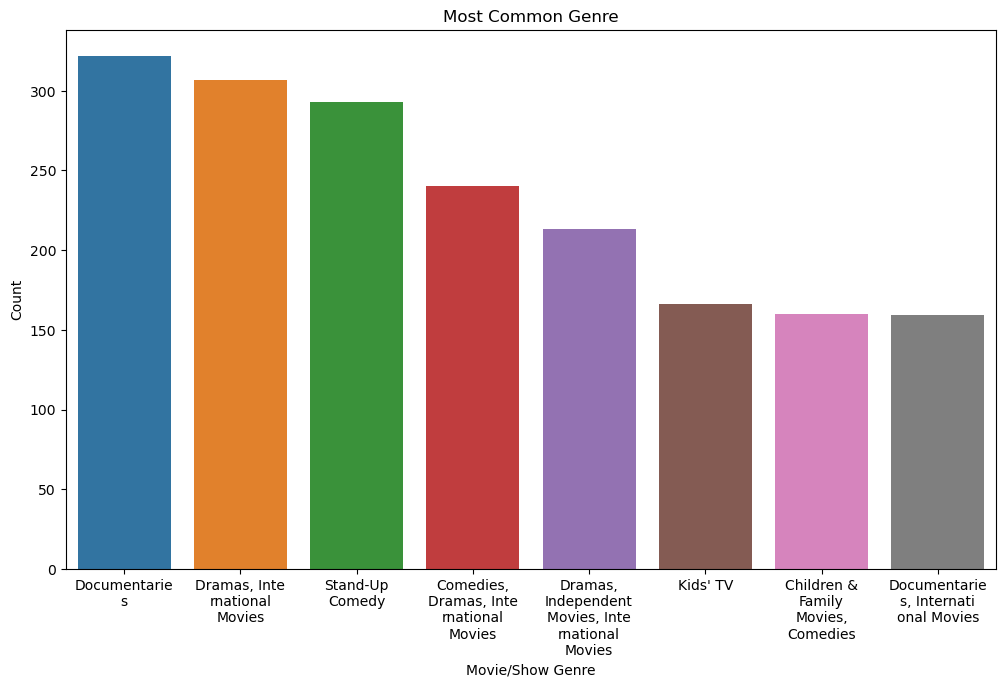

In [179]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(data = most_common_MS, y = most_common_MS['count'] , x = most_common_MS.index, hue = 'Type')
plt.xticks()
ax.set_xticklabels(wrap_labels(most_common_MS.index, 12))

plt.title('Most Common Genre')
plt.ylabel('Count')
plt.xlabel('Movie/Show Genre')
plt.savefig('Most Common Genre.png')

### Q2. What are the most common countries producing content?

In [180]:
df.head(1)

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."


In [181]:
country_wise_data = pd.DataFrame(df['Country'].value_counts())
country_wise_data

,count
Country,
United States,2546
India,923
United Kingdom,396
Japan,224
South Korea,183
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1


In [182]:
most_common_country = pd.DataFrame(country_wise_data[country_wise_data['count'] > 100])
most_common_country

,count
Country,
United States,2546
India,923
United Kingdom,396
Japan,224
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


/tmp/ipykernel_4525/4203800137.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



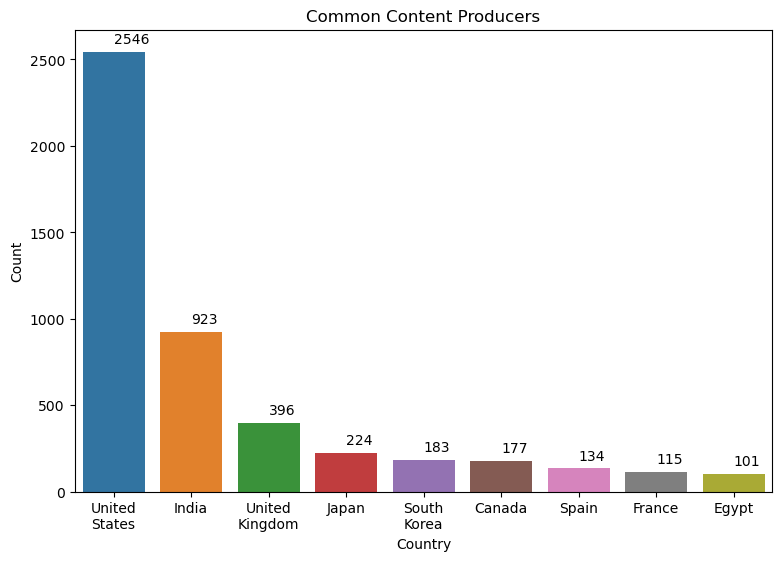

In [183]:
plt.figure(figsize = (9,6))
ax = sns.barplot(data = most_common_country, y = most_common_country['count'], x = most_common_country.index, hue = 'Country')
ax.set_xticklabels(wrap_labels(most_common_country.index, 10))
for index, value in enumerate(most_common_country['count']):
    plt.text(index, value+50, s = str(value))

plt.title('Common Content Producers')
plt.ylabel('Count')
plt.savefig('Common Content Producers.png')

# Ques for TV Shows

#### Since the Duration for TV Shows is in no of seasons, which seems insufficient. 
#### So Scrap the No of episodes for each of the TV shows from IMDB website

### Step1: store names of all the TV Shows first

In [184]:
tv_shows_df = df[df['Category'] != 'Movie']
tv_shows_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows"


In [185]:
tv_shows_df.to_csv('TV SHOWS_NAMES.csv', columns = ['Title'] , index = False)

### Step2: Scrap the data using the names in stored file

In [186]:
import urllib.parse
import time
import csv
import numpy as np
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

In [187]:
### Helper Functions to scrap the data

def search_and_get_link_for_a_show(soup_object):
    div_tag = soup_object.find('div', class_='sc-b03627f1-2 gWHDBT')
    if div_tag:
        ul_tag = div_tag.find('ul')
        if ul_tag:
            li_tag = ul_tag.find('li')
            if li_tag:
                anchor_tag = li_tag.find('a', class_='ipc-metadata-list-summary-item__t')
                if anchor_tag and 'href' in anchor_tag.attrs:
                    return 'https://www.imdb.com' + anchor_tag['href']
                
    return ''


def get_no_of_episodes(driver, link):
    if not link:
        return np.nan

    driver.get(link)
    time.sleep(2)

    soup2 = BeautifulSoup(driver.page_source, 'html.parser')
    div1 = soup2.find('div', class_='sc-57197f8e-0 jHYogi')
    if div1:
        div2 = div1.find('div', class_='sc-57197f8e-1 dSNwQI')
        if div2:
            req_div = div2.find('div', {'data-testid': 'hero-subnav-bar-left-block'})
            if req_div:
                a_tag = req_div.find('a')
                if a_tag:
                    span_tags = a_tag.find_all('span')
                    if len(span_tags) == 1:
                        return int(span_tags[0].text) if span_tags[0].text.isdigit() else np.nan
                    elif len(span_tags) == 2:
                        return int(span_tags[1].text) if span_tags[1].text.isdigit() else np.nan
                    
    return np.nan


def get_data_of_tv_shows(driver, TVShows_name):
    shows_data = []
    
    for name in TVShows_name:
        encoded_name = urllib.parse.quote(name)
        imdb_URL = f"https://www.imdb.com/find/?q={encoded_name}&s=tt&exact=true"

        driver.get(imdb_URL)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Get the show link
        link = search_and_get_link_for_a_show(soup)

        # Get number of episodes
        episodes = get_no_of_episodes(driver, link)

        shows_data.append([name, link, episodes])
    
    return shows_data


In [188]:
### Main Function

def FINAL_DATA(TV_show_data_file_path):
    all_chunks = pd.read_csv(TV_show_data_file_path, chunksize=400)

    driver = webdriver.Chrome()

    for i, chunk in enumerate(all_chunks):
        df = pd.DataFrame(chunk['Title'])
        names_of_shows = df['Title'].values
        print(f'Processing chunk {i}')

        req_shows_data = get_data_of_tv_shows(driver, names_of_shows)

        try:
            with open('tv_shows_data2.csv', 'a') as file:
                csvWriter = csv.writer(file)
                csvWriter.writerow(['TV Show Name', 'IMDB Link', 'No of Episodes'])
                csvWriter.writerows(req_shows_data)
        except Exception as e:
            print(f"Error in chunk {i}: {e}")

        print(f'Chunk {i} is Done')

    driver.quit()

In [189]:
# FINAL_DATA('TV SHOWS_NAMES.csv')

### Step3: Load the TV Show dataset

In [350]:
tv_shows_df = pd.read_csv('tv_shows_data.csv')

In [351]:
tv_shows_df.head()

,TV Show Name,IMDB Link,No of Episodes
0,3%,https://www.imdb.com/title/tt4922804/?ref_=fn_...,33
1,46,https://www.imdb.com/title/tt7262082/?ref_=fn_...,NaN
2,1983,https://www.imdb.com/title/tt7371666/?ref_=fn_...,8
3,1994,https://www.imdb.com/title/tt8736278/?ref_=fn_...,8
4,Feb-09,NaN,NaN


In [352]:
tv_shows_df = tv_shows_df[['TV Show Name', 'No of Episodes']] ### Since the link is not relevent

In [353]:
tv_shows_df.head()

,TV Show Name,No of Episodes
0,3%,33
1,46,NaN
2,1983,8
3,1994,8
4,Feb-09,NaN


In [354]:
tv_shows_df.shape

(2416, 2)

In [355]:
tv_shows_df.isnull().sum()

TV Show Name        0
No of Episodes    452
dtype: int64

In [356]:
### Since we could not get the no of episodes for each of them, filling using meadian

In [357]:
tv_shows_df['No of Episodes'] = pd.to_numeric(tv_shows_df['No of Episodes'], errors= 'coerce')

In [358]:
median = tv_shows_df['No of Episodes'].median()
tv_shows_df.fillna(median, inplace = True)

In [359]:
tv_shows_df.isnull().sum()

TV Show Name      0
No of Episodes    0
dtype: int64

In [360]:
tv_shows_df['No of Episodes'] = tv_shows_df['No of Episodes'].apply(lambda x: int(x))

#### Final TV Shows Duration Dataset

In [361]:
tv_shows_df.head()

,TV Show Name,No of Episodes
0,3%,33
1,46,20
2,1983,8
3,1994,8
4,Feb-09,20


### Q1. Top 20 Longest TV Shows

In [362]:
tv_shows_df.sort_values(by = 'No of Episodes', ascending = False)

,TV Show Name,No of Episodes
586,El señor de los Cielos,798
1619,Running Man,736
1813,Survivor,696
122,忍者ハットリくん,694
1367,Ninja Hattori,694
...,...,...
1410,On the Real,1
984,K.O. One Re-act,1
2309,"Wait, My Youth",1
410,Cocomong,1


In [363]:
top20_longest = tv_shows_df.sort_values(by = 'No of Episodes', ascending = False).head(20)
top20_longest

,TV Show Name,No of Episodes
586,El señor de los Cielos,798
1619,Running Man,736
1813,Survivor,696
122,忍者ハットリくん,694
1367,Ninja Hattori,694
2278,Upin & Ipin,688
1891,The Challenge,644
1461,Pawn Stars,640
2167,Thomas and Friends,602
1398,Oggy and the Cockroaches,519


### Q2. What is the distribution of TV show seasons?

Text(0.5, 1.0, 'TV Shows No of Episodes Distribution')

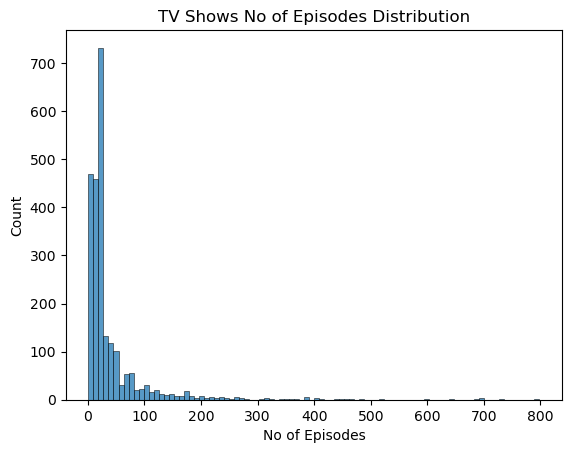

In [364]:
sns.histplot(tv_shows_df['No of Episodes'], bins = 90)
plt.title('TV Shows No of Episodes Distribution')

### Q3. Which countries produce longer TV shows?

In [365]:
### For these we have to merge the original df and episode data df

In [366]:
df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas


In [367]:
merged_df = df.merge(tv_shows_df, left_on = 'Title', right_on = 'TV Show Name', how = 'left')

In [368]:
merged_df.drop('TV Show Name', axis = 1, inplace = True)

In [369]:
merged_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",NaN
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies",NaN
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",NaN
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas,NaN


In [370]:
tv_show_data2 = merged_df[merged_df['Category'] == 'TV Show']
tv_show_data2.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",8.0
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",8.0
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",20.0


In [371]:
### Considering the mean No of episodes per country

country_wise_show_data = pd.DataFrame(tv_show_data2.groupby('Country')['No of Episodes'].mean())
country_wise_show_data

,No of Episodes
Country,
Argentina,21.125000
"Argentina, Spain",14.000000
"Argentina, United States, Mexico",7.000000
Australia,39.181818
"Australia, Canada",81.000000
...,...
"United States, South Korea, China",148.500000
"United States, Sweden",13.000000
"United States, United Kingdom",17.000000


In [372]:
country_wise_show_data['No of Episodes'] = country_wise_show_data['No of Episodes'].apply(lambda x: int(x))

In [373]:
country_wise_show_data = country_wise_show_data.sort_values(by = 'No of Episodes', ascending = False)
country_wise_show_data

,No of Episodes
Country,
"United States, Mexico, Colombia",798
"Colombia, United States",259
"Spain, United Kingdom",258
"United States, Colombia",241
"Japan, Canada",240
...,...
"Canada, Japan, Netherlands",4
"Spain, Cuba",4
"Germany, France, Russia",4


In [374]:
top_country_producers_for_TVShows = country_wise_show_data[country_wise_show_data['No of Episodes']> 100]
top_country_producers_for_TVShows

,No of Episodes
Country,
"United States, Mexico, Colombia",798
"Colombia, United States",259
"Spain, United Kingdom",258
"United States, Colombia",241
"Japan, Canada",240
"Denmark, Singapore, Canada, United States",212
"Mexico, United States, Spain, Colombia",183
"United Kingdom, Singapore",177
"Japan, Canada, United States",173


In [375]:
def wrap_text(label_list, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in label_list]

/tmp/ipykernel_4525/1816482312.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



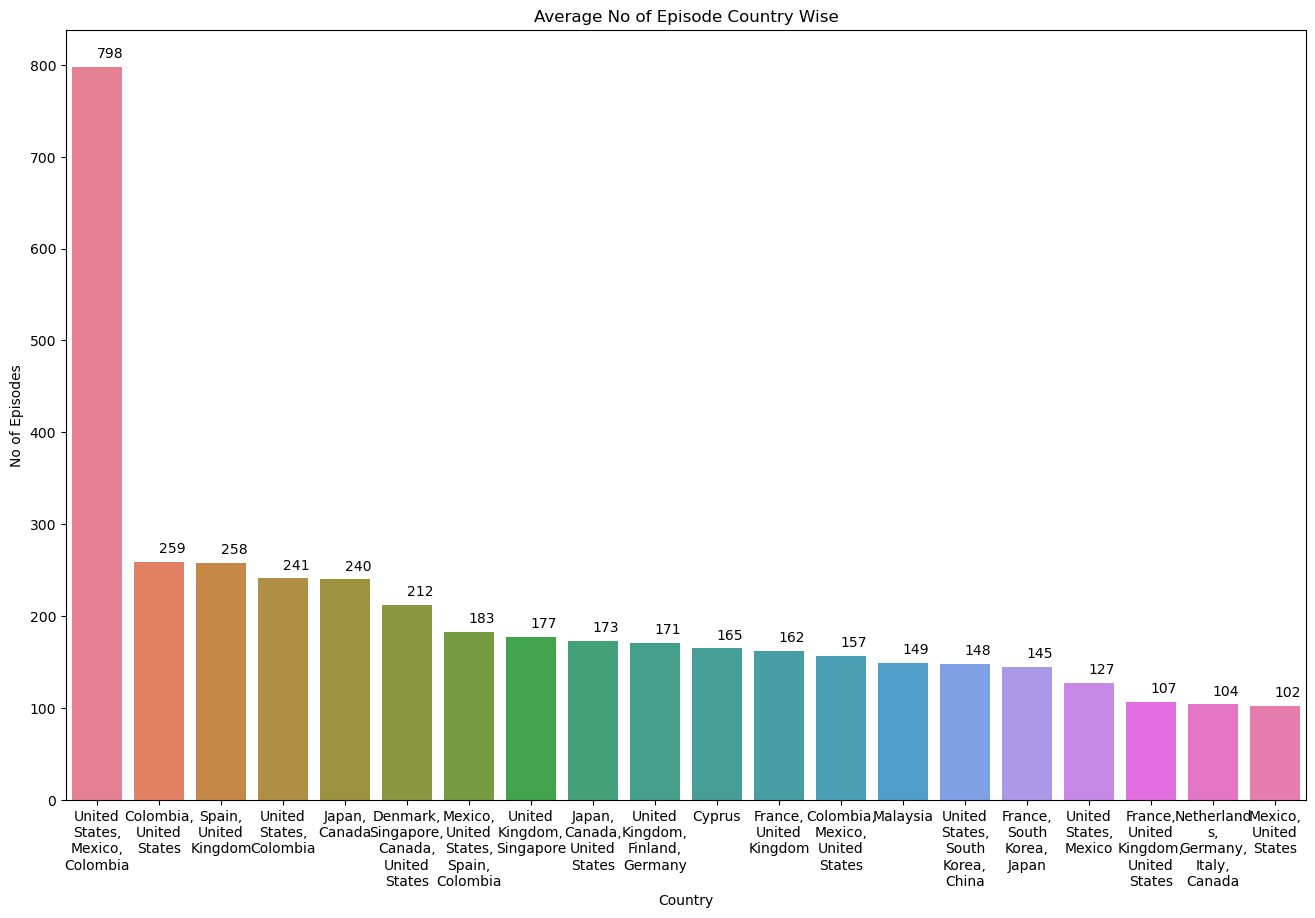

In [376]:
fig = plt.figure(figsize = (16, 10))
ax = sns.barplot(top_country_producers_for_TVShows, x = top_country_producers_for_TVShows.index, y = top_country_producers_for_TVShows['No of Episodes'], hue = 'Country')
plt.title('Average No of Episode Country Wise')
ax.set_xticklabels(wrap_text(top_country_producers_for_TVShows.index, 10))

for index, value in enumerate(top_country_producers_for_TVShows['No of Episodes']):
    plt.text(index, value+10, str(value))
    
plt.savefig('TV SHOWS DATA/Country Wise Avg No of Episodes.png')

### Q4. What is the Rating Distribution

In [377]:
import plotly.express as px

In [378]:
tv_show_data2.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",8.0
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",8.0
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",20.0


In [379]:
rating_data = tv_show_data2.groupby('Rating')['Title'].describe()['count']
rating_data

Rating
NR            4
R             1
TV-14       576
TV-G         74
TV-MA       935
TV-PG       256
TV-Y        131
TV-Y7       144
TV-Y7-FV      1
Name: count, dtype: object

In [380]:
label = list(rating_data.index)
data = rating_data.values
fig = px.pie(rating_data, names = label, values = data, title = 'Rating Wise TV Shows Distribution')
fig.show()

In [381]:
fig.write_image('TV SHOWS DATA/Rating Wise TV Shows Distribution.png')

In [382]:
tv_show_data2.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",8.0
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",8.0
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",20.0


### Q5. How has the number of TV shows changed over the years?

In [383]:
### First we need to get the year for each of the tv show

In [384]:
type(tv_show_data2.Release_Date[0])

datetime.date

In [385]:
tv_show_data2.Release_Date[0].year

2020

In [386]:
tv_show_data2.dropna(subset = 'Release_Date', inplace = True)

/tmp/ipykernel_4525/1296228138.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
tv_show_data2['year'] = tv_show_data2.Release_Date.apply(lambda x: int(x.year))

/tmp/ipykernel_4525/963738002.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [388]:
tv_show_data2.head(2)

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes,year
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0,2020
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0,2017


In [389]:
### now get the year wise data
year_wise_count = pd.DataFrame(tv_show_data2.groupby('year')['Title'].describe()['count'])
year_wise_count

,count
year,
2008,1
2013,5
2014,6
2015,29
2016,174
2017,320
2018,353
2019,571
2020,639


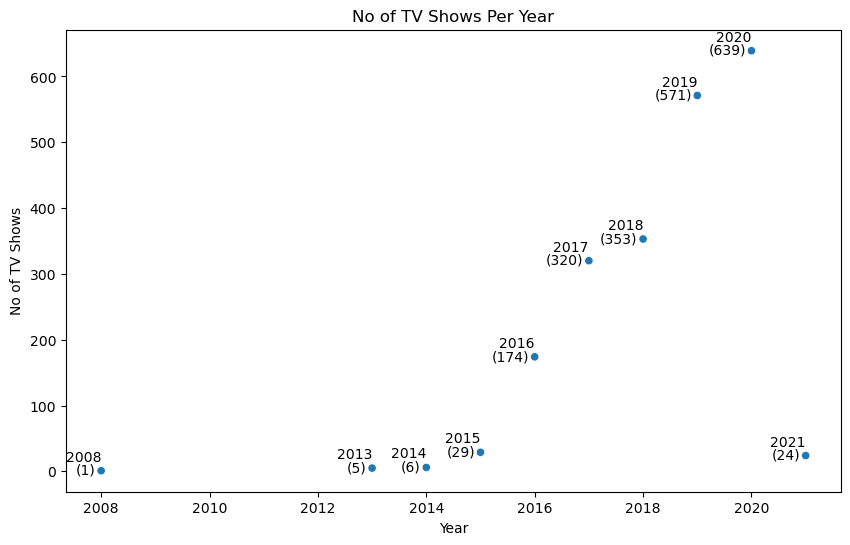

In [390]:
fig = plt.figure(figsize = (10, 6))
sns.scatterplot(year_wise_count, legend = False)
plt.title('No of TV Shows Per Year')
plt.ylabel('No of TV Shows')
plt.xlabel('Year')

for year, count in zip(year_wise_count.index, year_wise_count['count']):
    plt.text(year, count+10, s = str(year), ha = 'right', va = 'bottom')
    plt.text(year-0.1, count-10, s ='('+str(count)+')', ha = 'right', va = 'bottom')
    
plt.savefig('TV SHOWS DATA/No of TV Shows Per Year.png')

### Q6. Relationship Between Release Year and TV Show Duration

In [391]:
tv_show_data2.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes,year
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0,2020
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0,2017
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",8.0,2018
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",8.0,2019
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",20.0,2020


In [392]:
year_wise_episodes_count = pd.DataFrame(tv_show_data2.groupby('year')['No of Episodes'].mean(), columns = ['No of Episodes'])

In [393]:
year_wise_episodes_count['No of Episodes'] = year_wise_episodes_count['No of Episodes'].astype(int)

In [394]:
year_wise_episodes_count

,No of Episodes
year,
2008,49
2013,51
2014,45
2015,49
2016,33
2017,44
2018,37
2019,36
2020,46


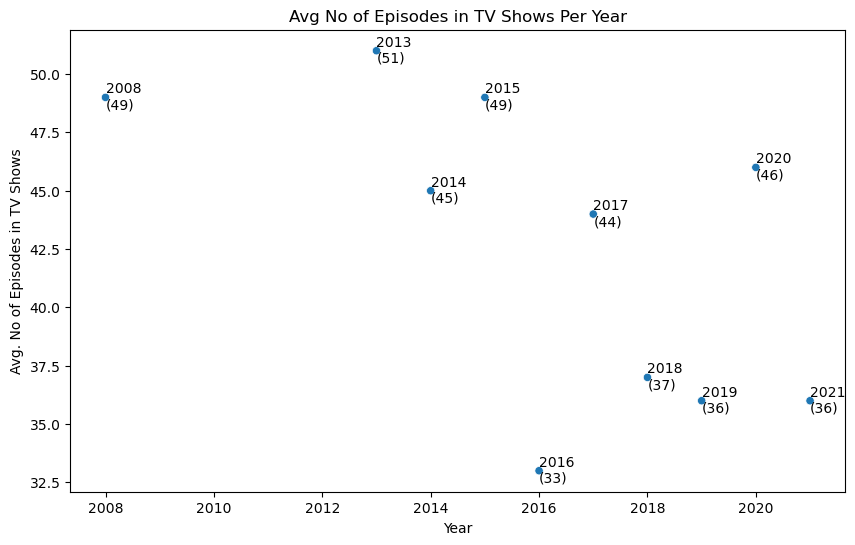

In [400]:
fig = plt.figure(figsize = (10, 6))
sns.scatterplot(year_wise_episodes_count, legend = False)
plt.title('Avg No of Episodes in TV Shows Per Year')
plt.ylabel('Avg. No of Episodes in TV Shows')
plt.xlabel('Year')

for year, count in zip(year_wise_episodes_count.index, year_wise_episodes_count['No of Episodes']):
    plt.text(year, count+0.2, s = str(year))
    plt.text(year, count-0.5, s ='('+str(count)+')')
    
plt.savefig('TV SHOWS DATA/Avg No of Episodes in TV Shows Per Year.png')

In [396]:
### Save the cleared TV Shows Dataset
tv_show_data2.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type,No of Episodes,year
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",33.0,2020
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",20.0,2017
11,s12,TV Show,1983,NaN,"Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",8.0,2018
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",8.0,2019
23,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,Japan,2020-01-23,TV-14,2 Seasons,"Anime Series, International TV Shows",20.0,2020


In [401]:
tv_show_data2.drop(columns = ['year', 'Category'], axis = 1, inplace= True)

/tmp/ipykernel_4525/901311394.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [402]:
tv_show_data2.to_csv('TV SHOWS DATA/Cleared_Final_Data_TV_SHOWS.csv')

# Ques About Movies

In [403]:
### Firstly get and clean the movies data from original df

In [404]:
df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas


In [412]:
movies_df = df.loc[df['Category'] == 'Movie']
movies_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas
6,s7,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies"


In [413]:
### removing min unit from duration, it will cause problem in analysis

In [414]:
movies_df['Duration'] = movies_df['Duration'].apply(lambda x: int(x.strip().split()[0]))

/tmp/ipykernel_4525/4271155652.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [415]:
movies_df.rename(columns = {'Duration': 'Duration(min)'}, inplace = True)

/tmp/ipykernel_4525/3213101211.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [416]:
movies_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration(min),Type
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123,Dramas
6,s7,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies"


### Q1. What are the top 10 most common movie durations?

In [417]:
movies_df['Duration(min)'].value_counts()

Duration(min)
90     135
93     128
94     124
91     120
95     119
      ... 
312      1
224      1
37       1
15       1
191      1
Name: count, Length: 195, dtype: int64

In [418]:
movies_df['Duration(min)'].value_counts().head(10)

Duration(min)
90     135
93     128
94     124
91     120
95     119
97     115
92     115
96     109
103    100
99      99
Name: count, dtype: int64

In [419]:
movies_df['Duration(min)'].value_counts().head(10).index

Index([90, 93, 94, 91, 95, 97, 92, 96, 103, 99], dtype='int64', name='Duration(min)')

In [420]:
print('MOST COMMON DURATIONs: ')
print(list(movies_df['Duration(min)'].value_counts().head(10).index))

MOST COMMON DURATIONs: 
[90, 93, 94, 91, 95, 97, 92, 96, 103, 99]


### Q2. How has the number of movies changed over the years?

In [421]:
movies_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration(min),Type
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123,Dramas
6,s7,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies"


In [422]:
movies_df['year'] = movies_df.Release_Date.apply(lambda x: x.year)

/tmp/ipykernel_4525/4197194648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [423]:
movies_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration(min),Type,year
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies",2016
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies",2018
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123,Dramas,2020
6,s7,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies",2020


In [424]:
year_wise_movie_count = pd.DataFrame(movies_df.groupby('year')['Title'].describe()['count'])
year_wise_movie_count

,count
year,
2008,1
2009,2
2010,1
2011,13
2012,3
2013,6
2014,19
2015,54
2016,247


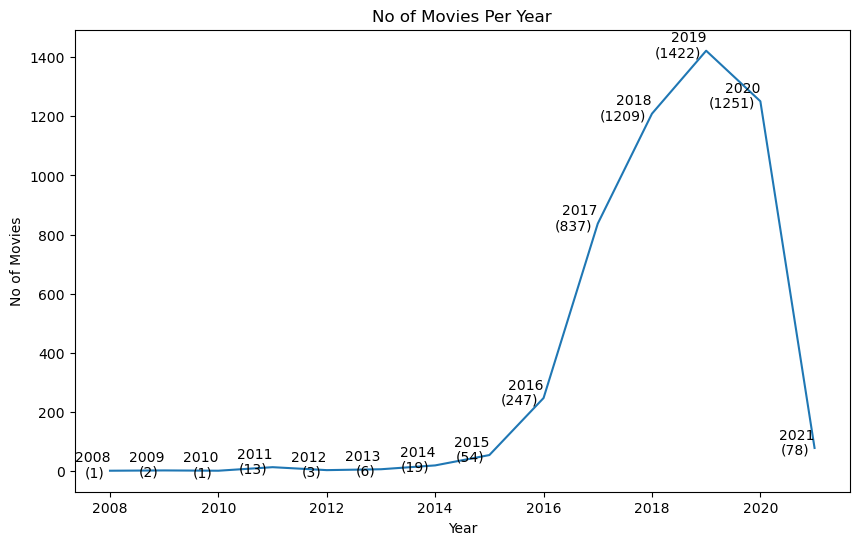

In [425]:
fig = plt.figure(figsize = (10, 6))
sns.lineplot(year_wise_movie_count, legend = False)
plt.title('No of Movies Per Year')
plt.ylabel('No of Movies')
plt.xlabel('Year')

for year, count in zip(year_wise_movie_count.index, year_wise_movie_count['count']):
    plt.text(year, count+20, s = str(year), ha = 'right', va = 'bottom')
    plt.text(year-0.1, count-30, s ='('+str(count)+')', ha = 'right', va = 'bottom')
    
plt.savefig('Movies Data/No of Movies Per Year.png')

### Q3. Year Wise Leading Genre

In [426]:
movies_df.head(2)

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration(min),Type,year
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies",2016
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies",2018


In [427]:
common_movies_genre_year_wise = movies_df.groupby('year')['Type'].describe()[['top', 'freq']].sort_values(by = 'freq', ascending = False)
common_movies_genre_year_wise['Year'] = common_movies_genre_year_wise.index.astype(int)
common_movies_genre_year_wise = common_movies_genre_year_wise.sort_values(by = 'Year')
common_movies_genre_year_wise

,top,freq,Year
year,,,
2008,"Dramas, Independent Movies, Thrillers",1,2008
2009,"Dramas, International Movies",1,2009
2010,"Cult Movies, Horror Movies",1,2010
2011,Dramas,8,2011
2012,Documentaries,1,2012
2013,Stand-Up Comedy,4,2013
2014,Documentaries,5,2014
2015,Stand-Up Comedy,11,2015
2016,Documentaries,35,2016


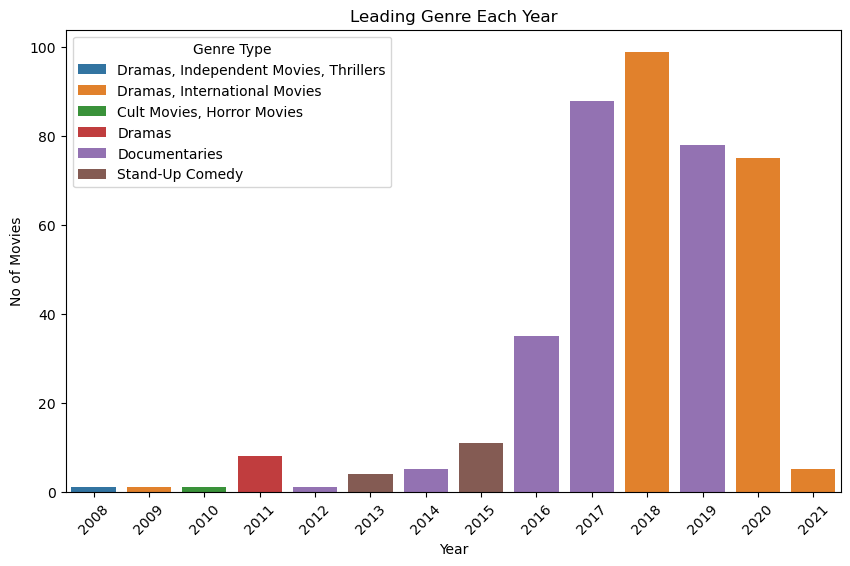

In [428]:
fig = plt.figure(figsize=(10, 6))  
ax = sns.barplot(data=common_movies_genre_year_wise, x='Year', y='freq', hue='top', dodge=False)

plt.ylabel('No of Movies')
plt.title('Leading Genre Each Year')
plt.xticks(rotation=45)  

plt.legend(title="Genre Type")
plt.savefig('Movies Data/Leading Genre Each Year.png')


### Q4. What is the average duration of a movie on Netflix?

In [429]:
d = int(movies_df['Duration(min)'].mean())
print(f'AVG. DURATION OF A MOVIE ON NETFLIX: {d} min')

AVG. DURATION OF A MOVIE ON NETFLIX: 100 min


### Q5. Are there any patterns in movie duration over the years?

In [430]:
duration_trend_with_year = pd.DataFrame(movies_df.groupby('year')['Duration(min)'].describe()['mean'].astype(int))
duration_trend_with_year

,mean
year,
2008,81
2009,66
2010,84
2011,93
2012,62
2013,83
2014,77
2015,83
2016,84


In [431]:
fig = px.line(duration_trend_with_year, labels={'year': 'Year', 'value': 'Avg. Duration of Movie(in Min)'}, title= 'Duration Trend Over the Years', text = 'value')
fig.update_layout(showlegend = False)

In [432]:
fig.write_image('Movies Data/Duration Trend Over the Years.png')

### Q6. What is the distribution of movie durations?

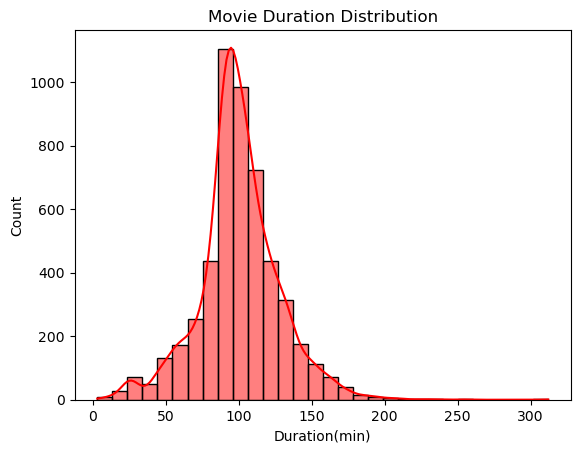

In [433]:
sns.histplot(movies_df['Duration(min)'], bins = 30, color = 'red', kde = True)
plt.title('Movie Duration Distribution')
plt.savefig('Movies Data/Movie Duration Distribution.png')

### Q7. Which genres have longer/shorter movies?

In [434]:
### Movies Name that are longer than 120 min

In [435]:
long_movies = movies_df.groupby('Type')['Duration(min)'].describe()['mean'].sort_values(ascending =False)

In [436]:
long_movies

Type
Action & Adventure, Cult Movies, Dramas                     172.000000
Action & Adventure, Classic Movies, International Movies    166.000000
Dramas, Music & Musicals, Sports Movies                     157.000000
Classic Movies, Dramas, Romantic Movies                     153.666667
Action & Adventure, Sci-Fi & Fantasy, Thrillers             148.000000
                                                               ...    
International Movies, Sports Movies                          53.000000
Classic Movies, Documentaries                                49.181818
Movies                                                       46.705882
Children & Family Movies, Comedies, LGBTQ Movies             46.000000
Action & Adventure, Documentaries, Sports Movies             40.000000
Name: mean, Length: 264, dtype: float64

In [437]:
long_movies = long_movies[long_movies.values > 120]

In [438]:
long_movies_names = list(long_movies.index)
long_movies_names[:5]

['Action & Adventure, Cult Movies, Dramas',
 'Action & Adventure, Classic Movies, International Movies',
 'Dramas, Music & Musicals, Sports Movies',
 'Classic Movies, Dramas, Romantic Movies',
 'Action & Adventure, Sci-Fi & Fantasy, Thrillers']

In [439]:
### Get the Names of Movies with Duration less than 90 min

In [440]:
short_movies = movies_df.groupby('Type')['Duration(min)'].describe()['mean'].sort_values(ascending =False)

In [441]:
short_movies = short_movies[short_movies.values < 90]

In [442]:
short_movies_name = list(short_movies.index)
short_movies_name[:5]

['Horror Movies',
 'Comedies, Cult Movies',
 'Comedies, Independent Movies',
 'Children & Family Movies, Sports Movies',
 'Documentaries, LGBTQ Movies, Music & Musicals']

### Q8. How do movie durations compare across different countries?

In [443]:
country_wise_movies_data = movies_df.groupby('Country')['Duration(min)'].describe()['mean'].astype(int).sort_values(ascending = False)
country_wise_movies_data

Country
United Kingdom, United States, Japan                   208
United States, United Kingdom, Morocco                 205
United States, Italy, United Kingdom, Liechtenstein    200
New Zealand, United States                             190
Romania, France, Switzerland, Germany                  186
                                                      ... 
Ireland, Canada                                         30
Namibia                                                 29
United Kingdom, Kenya                                   28
Georgia                                                 24
France, South Korea, Japan                              22
Name: mean, Length: 590, dtype: int64

In [444]:
### Get the countries with avg. movies duration more than 150 min

In [445]:
longer_movies_country = country_wise_movies_data.loc[country_wise_movies_data.values > 150]
longer_movies_country

Country
United Kingdom, United States, Japan                   208
United States, United Kingdom, Morocco                 205
United States, Italy, United Kingdom, Liechtenstein    200
New Zealand, United States                             190
Romania, France, Switzerland, Germany                  186
France, Belgium, Spain                                 180
Germany, United States, Hong Kong, Singapore           172
United Kingdom, United States, Morocco                 161
India, Soviet Union                                    161
India, Malaysia                                        158
United States, Sweden, Norway                          158
Croatia, Slovenia, Serbia, Montenegro                  157
Name: mean, dtype: int64

In [446]:
print('countries with avg. movies duration more than 150 min:'.upper())
print()
print(list(longer_movies_country.index))

COUNTRIES WITH AVG. MOVIES DURATION MORE THAN 150 MIN:

['United Kingdom, United States, Japan', 'United States, United Kingdom, Morocco', 'United States, Italy, United Kingdom, Liechtenstein', 'New Zealand, United States', 'Romania, France, Switzerland, Germany', 'France, Belgium, Spain', 'Germany, United States, Hong Kong, Singapore', 'United Kingdom, United States, Morocco', 'India, Soviet Union', 'India, Malaysia', 'United States, Sweden, Norway', 'Croatia, Slovenia, Serbia, Montenegro']


In [447]:
### Get the countries with avg. movies duration less than 70 min

In [448]:
shorter_movies_country = country_wise_movies_data.loc[country_wise_movies_data.values < 70]
shorter_movies_country

Country
Italy, United States, Argentina                                  69
Guatemala                                                        69
Switzerland, France                                              68
United States, Brazil, India, Uganda, China                      68
Uruguay, Guatemala                                               67
United States, Kazakhstan                                        67
Argentina, Italy                                                 66
Ireland, United States, France                                   53
Czech Republic, France                                           52
Canada, United Kingdom                                           51
Mexico, Argentina                                                51
Australia, Canada                                                51
United Kingdom, United States, Spain, Germany, Greece, Canada    49
Denmark, China                                                   44
Ireland, Canada                         

In [449]:
print('countries with avg. movies duration less then 70 min:'.upper())
print()
print(list(shorter_movies_country.index))

COUNTRIES WITH AVG. MOVIES DURATION LESS THEN 70 MIN:

['Italy, United States, Argentina', 'Guatemala', 'Switzerland, France', 'United States, Brazil, India, Uganda, China', 'Uruguay, Guatemala', 'United States, Kazakhstan', 'Argentina, Italy', 'Ireland, United States, France', 'Czech Republic, France', 'Canada, United Kingdom', 'Mexico, Argentina', 'Australia, Canada', 'United Kingdom, United States, Spain, Germany, Greece, Canada', 'Denmark, China', 'Ireland, Canada', 'Namibia', 'United Kingdom, Kenya', 'Georgia', 'France, South Korea, Japan']


### Q9. Rating Wise Movie Distribution

In [450]:
rating_data = movies_df.groupby('Rating')['Duration(min)'].describe()['count'].astype(int)
rating_data

Rating
G             39
NC-17          3
NR            79
PG           244
PG-13        383
R            662
TV-14       1216
TV-G         103
TV-MA       1767
TV-PG        483
TV-Y          79
TV-Y7         76
TV-Y7-FV       4
UR             5
Name: count, dtype: int64

In [451]:
label = list(rating_data.index)
data = rating_data.values
fig = px.pie(rating_data, names = label, values = data, title = 'Rating Wise Movies Distribution')
fig.show()

In [452]:
fig.write_image('Movies Data/Rating Wise Movies Distribution.png')

### Q10. Country Wise Movies Distribution

In [453]:
no_of_movies_over_Country =pd.DataFrame( movies_df.groupby('Country')['Title'].describe()['count']).sort_values(by = 'count', ascending = False)
no_of_movies_over_Country

,count
Country,
United States,1847
India,852
United Kingdom,193
Canada,118
Spain,89
...,...
"India, Switzerland",1
"India, Pakistan",1
"India, Nepal",1


In [454]:
top_countries_with_more_movies = no_of_movies_over_Country.head(10)
top_countries_with_more_movies

,count
Country,
United States,1847
India,852
United Kingdom,193
Canada,118
Spain,89
Egypt,89
Turkey,73
Philippines,70
France,69


In [455]:
import textwrap
def text_wrap(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

/tmp/ipykernel_4525/2861575153.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



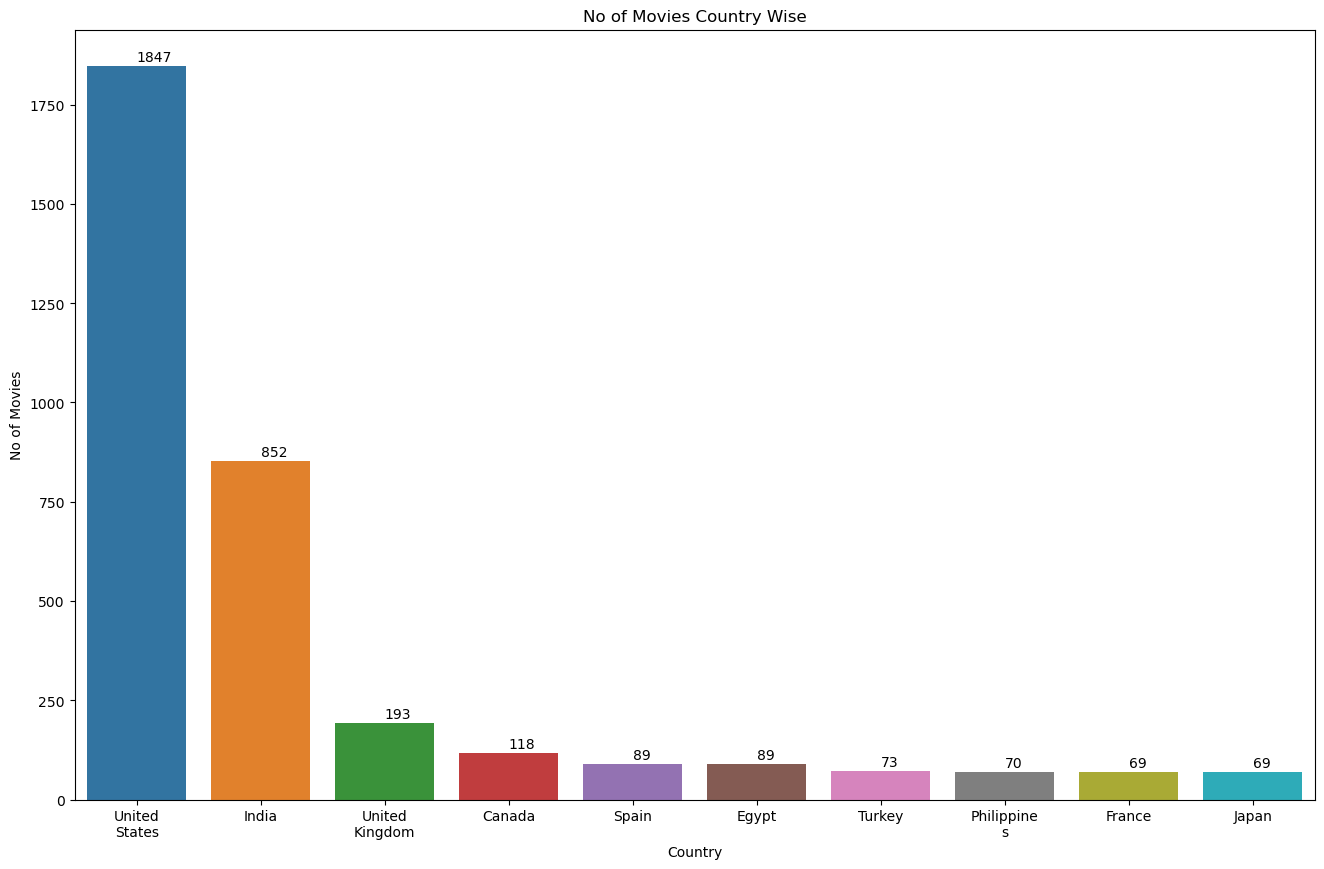

In [456]:
fig = plt.figure(figsize = (16, 10))
ax = sns.barplot(top_countries_with_more_movies, x = top_countries_with_more_movies.index, y = top_countries_with_more_movies['count'], hue = 'Country')
plt.title('No of Movies Country Wise')
ax.set_xticklabels(wrap_text(top_countries_with_more_movies.index, 10))
plt.ylabel('No of Movies')

for index, value in enumerate(top_countries_with_more_movies['count']):
    plt.text(index, value+12, str(value))
    
plt.savefig('Movies Data/No of Movies Country Wise.png')

### Storing the final Movies Data

In [346]:
movies_df.head()

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration(min),Type,year
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies",2016
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies",2018
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123,Dramas,2020
6,s7,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies",2020


In [347]:
movies_df.drop(columns = ['year', 'Category'], axis = 1, inplace = True)

/tmp/ipykernel_4525/811632354.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [348]:
movies_df.head()

,Show_Id,Title,Director,Country,Release_Date,Rating,Duration(min),Type
1,s2,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93,"Dramas, International Movies"
2,s3,23:59,Gilbert Chan,Singapore,2018-12-20,R,78,"Horror Movies, International Movies"
3,s4,9,Shane Acker,United States,2017-11-16,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,21,Robert Luketic,United States,2020-01-01,PG-13,123,Dramas
6,s7,122,Yasir Al Yasiri,Egypt,2020-06-01,TV-MA,95,"Horror Movies, International Movies"


In [457]:
movies_df.to_csv('Movies Data/ Final_Movie_Data.csv', index = False)

In [461]:
df.head(5)

,Show_Id,Category,Title,Director,Country,Release_Date,Rating,Duration,Type
0,s1,TV Show,3%,NaN,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,07:19,Jorge Michel Grau,Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,PG-13,123 min,Dramas


In [460]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [463]:
df.groupby('Rating')['Type'].value_counts()

Rating    Type                                              
G         Children & Family Movies                              15
          Children & Family Movies, Comedies                     6
          Children & Family Movies, Dramas                       3
          Documentaries                                          2
          Children & Family Movies, Classic Movies, Comedies     2
                                                                ..
TV-Y7-FV  Action & Adventure, Children & Family Movies           1
UR        Dramas, International Movies, Romantic Movies          2
          Comedies, Romantic Movies                              1
          Action & Adventure, Dramas, International Movies       1
          Action & Adventure, Comedies                           1
Name: count, Length: 1145, dtype: int64